In [15]:
import numpy as np
import tensorflow as tf
import rasterio as rio
from rasterio.plot import show
import matplotlib.pyplot as plt


In [16]:
bq_lulc = rio.open('../../dados/barbacena_2019.tif').read().astype(float)
bq_dem = rio.open('../../dados/barbacena_elevacao.tif').read().astype(float)
bq_slope = rio.open('../../dados/slope.tiff').read().astype(float)
bq_rivers = rio.open('../../dados/proximity_rivers.tiff').read().astype(float)

In [17]:
bq_dem[bq_dem == 0.0] = np.nan
bq_lulc[bq_lulc == 0.0] = np.nan

## Criando o Modelo 

$f: LULC \times DECLIVIDADE \times TOPOGRAFIA \times DISTANCIA \ RIOS \mapsto M $

$M = \{\rho : \rho$  um pixel sucetivel a alagamento $\}$

In [7]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential

In [49]:
model = Sequential()

model.add(Input(shape= (217, 317, 4)))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(20))
model.add(Dense(1, activation = 'softmax'))

In [50]:
model.compile(optimizer= 'adam', loss = 'categorical_cross_entropy', metrics= 'acuracy')

In [51]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 217, 317, 100)     500       
                                                                 
 dense_16 (Dense)            (None, 217, 317, 20)      2020      
                                                                 
 dense_17 (Dense)            (None, 217, 317, 1)       21        
                                                                 
Total params: 2541 (9.93 KB)
Trainable params: 2541 (9.93 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
dados = np.squeeze(np.array([bq_dem, bq_lulc, bq_rivers, bq_slope]))
dados.shape #(4, 217, 317)
dados = dados.transpose(1, 2, 0)
dados = np.expand_dims(dados, axis=0)


In [53]:
teste = model.predict(dados)

1/1 [==============================] - 0s 186ms/step


2023-10-12 00:09:48.658846: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 27515600 exceeds 10% of free system memory.


In [55]:
teste = np.squeeze(teste)

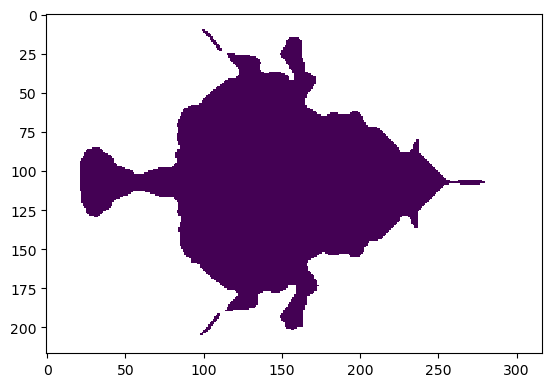

<AxesSubplot:>

In [56]:
show(teste)